In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("resources/KNN_Project_Data")

# The data has 11 columns and 1000 entries(rows). To perform a KNN model on this data we will need to standardize the data because the variables are on somewhat of a large scale.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scalar = StandardScaler()

In [7]:
scalar.fit(df.drop("TARGET CLASS", axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_Features = scalar.transform(df.drop("TARGET CLASS", axis =1))

In [9]:
features_df = pd.DataFrame(scaled_Features, columns=df.columns[:-1])

In [10]:
features_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Train test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = features_df
y = df["TARGET CLASS"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Import KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
predicitons = knn.predict(X_test)

### Metrics

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, predicitons))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [20]:
print(confusion_matrix(y_test, predicitons))

[[109  43]
 [ 41 107]]


### Elbow method to improve

In [21]:
error_rate = []
for i in range(1,40):
    kcalss = KNeighborsClassifier(n_neighbors=i)
    kcalss.fit(X_train,y_train)
    predict = kcalss.predict(X_test)
    error_rate.append(np.mean(predict != y_test))

## Plot to get the best K Value, 31 looks to give the lowest error and would be the most accurate 

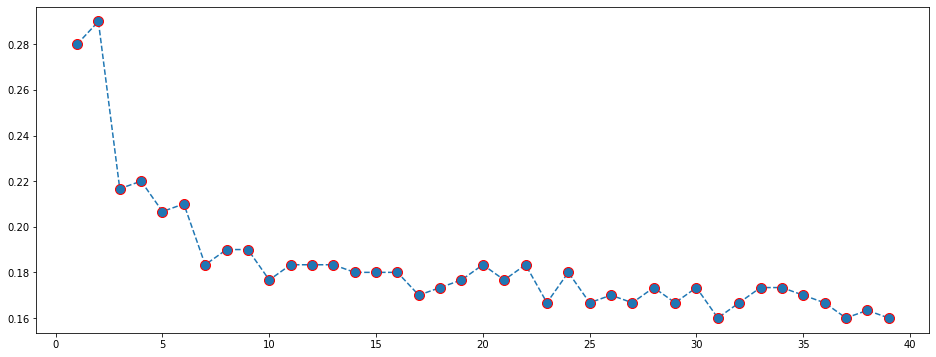

In [22]:
plt.figure(figsize= (16,6))
plt.plot(range(1,40), error_rate, ls= "--", marker = "o", mec = "r", ms= 10)

### WE see a 9% incease in our precision for this model

In [23]:
kn =KNeighborsClassifier(n_neighbors=31)
kn.fit(X_train, y_train)
pre = kn.predict(X_test)
print(classification_report(y_test,pre))
print(confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[123  29]
 [ 19 129]]


### We get a significant increase in out predictions but lets see if we can improve this by reducing the demensions of the data using Principal Component Analysis. 

In [24]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

In [27]:
pca.fit(scaled_Features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
x_pca = pca.transform(scaled_Features)

### CA did not do a perfect job with separation of the data but looks like it was pretty accuraturate in separation on the data. Lets look at a heat map below to take a better look.

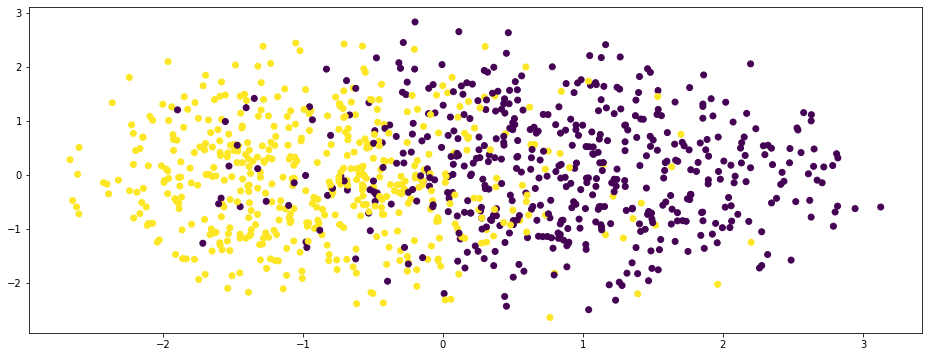

In [32]:
plt.figure(figsize=(16,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = df["TARGET CLASS"])

In [33]:
pcs_frame = pd.DataFrame(pca.components_, columns=features_df.columns)

In [34]:
pcs_frame

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.075774,0.493515,-0.493476,0.284463,-0.317943,0.039156,-0.338946,0.261404,0.160699,0.338529
1,-0.284477,0.019879,-0.186400,-0.604430,-0.411765,-0.171710,-0.151788,-0.043536,-0.541127,0.042528


### We can see which variables were more correlated to one another as well to which component.

In [35]:
import seaborn as sns

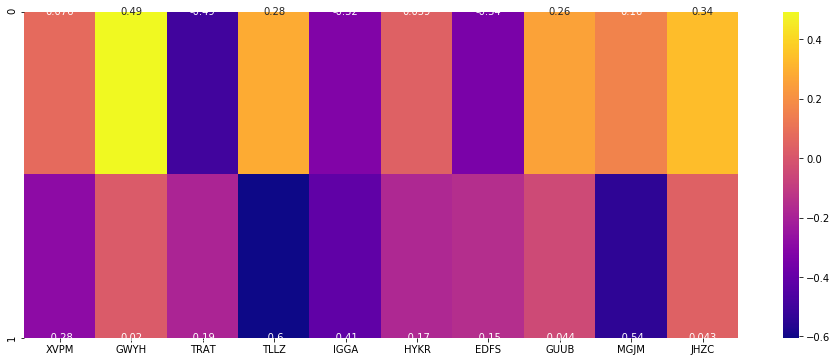

In [38]:
plt.figure(figsize=(16,6))
sns.heatmap(pcs_frame, cmap="plasma", annot=True);

### Lets now run a KNN Model on the pca data vs the oridinal data with 10 denensions

In [41]:
new_Fame = pd.DataFrame(x_pca, columns=["pc1","pc2"])

In [42]:
new_Fame.head()

,pc1,pc2
0,-1.583938,-0.436172
1,-2.009532,0.161765
2,0.796805,-1.826420
3,1.378793,1.380319
4,1.897855,0.341097


In [43]:
X= new_Fame
y = df["TARGET CLASS"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [45]:
knk = KNeighborsClassifier(n_neighbors=1)

In [46]:
knk.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [47]:
predk = knk.predict(X_test)

## Using PCA we get a better result then the original data uoins a default K of 1, 73%  vs 78%. lets try to find a better K value witth the PCA Data

In [48]:
print(classification_report(y_test,predk))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       152
           1       0.78      0.77      0.78       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [49]:
print(confusion_matrix(y_test,predk))

[[120  32]
 [ 34 114]]


In [50]:
errorR = []

In [55]:
for k in range(1,40):
    kk = KNeighborsClassifier(n_neighbors=k)
    kk.fit(X_train,y_train)
    pree = kk.predict(X_test)
    errorR.append(np.mean(y_test != pree))

### Lets plot this to get a better visual

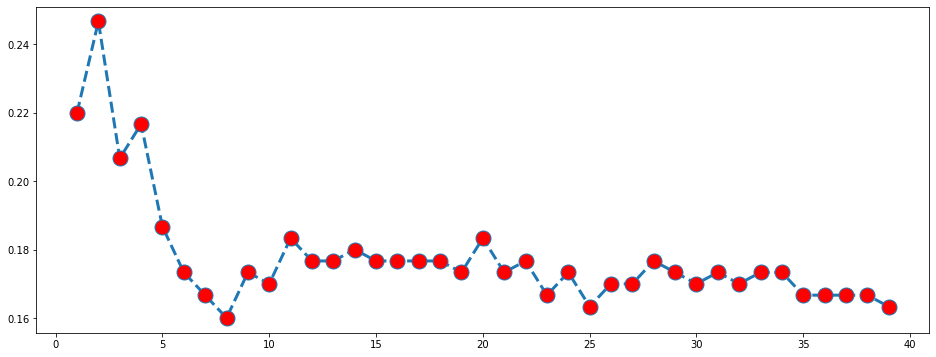

In [61]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), errorR, ls = "--", lw = 3,marker = "o", mfc = "r", ms = 15)

### Lookes like a k value of  would work better 
### We see a slight improvment in rcecall and the f score. Depends on what we are going for here

In [68]:
knnn = KNeighborsClassifier(n_neighbors=8)
knnn.fit(X_train,y_train)
pp = knnn.predict(X_test)
print(classification_report(y_test,pp))
print(confusion_matrix(y_test,pp))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       152
           1       0.86      0.81      0.83       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[132  20]
 [ 28 120]]
